## Plan for today:

Solve exercise 4 and 5


* Introduce uncertainty into the cake eating problem

* Learn how to do numerical integration

## Exercise 4: Introducing uncertainty
    
Consider the model with uncertainty:
$$\begin{aligned}
    V_{t}(W_{t}) & = \max_{c_{t}}\left\{ \sqrt{c_{t}} + \beta \sum_{i=1}^K V_{t+1}(W_t-c_t+\varepsilon_i)\pi_i  \right\} \\
 & \text{s.t.}\\
c_{t} & \leq  W_{t} , \,\forall t\\
c_{t} & \in  \mathbb{R}_+, \,\forall t \\
\varepsilon_i & \in \mathbb{N}  \text{ with probability } \pi_i\ge 0, i=1,\dots,K, \text{ and } \sum_{i=1}^K \pi_i=1
\end{aligned}$$
for $T=10$, $\beta=0.90$ and $W_{1}=10$. Further assume that $\epsilon_i$ follows a uniform distribution, $K=5$ and $\epsilon_{i} \in (0,1,2,3,4)$

First thing, we need to make a discretized grid of $W_t$ that grows. Notice, if the person is really lucky, he gets 4 ekstra resources every period. This is how the grid looks with 200 points.


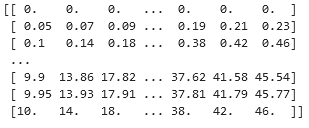

## Backward Induction ($T=10$)

Start in the last period, i.e. $T=10$. Use whatever remaining resources, because you will be dead tomorrow. 

$$V_T^*(W)=\sqrt{W}$$


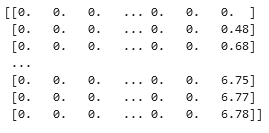

  

How to spend resources in $t=9$? Use the Bellman equation:

$$\begin{aligned}
    V_{t}(W_{t}) & = \max_{c_{t}}\left\{ \sqrt{c_{t}} + \beta \sum_{i=1}^K V_{t+1}(W_t-c_t+\varepsilon_i)\pi_i  \right\}
\end{aligned}$$

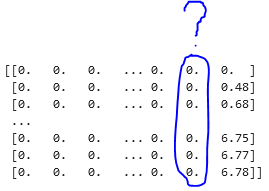

How to spend resources in $t=9$?

$$\begin{aligned}
    V_{T-1}(W_{T-1}) & = \max_{c_{T-1}}\left\{ \sqrt{c_{T-1}} + \beta \sum_{i=1}^K V_{T}(W_{T-1}-c_{T-1}+\varepsilon_i)\pi_i  \right\}
\end{aligned}$$
For instance, what if you had $W=42$ resources left? 

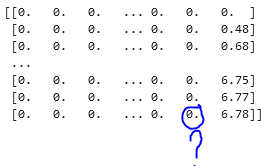

Create a consumption grid as a share of resources. In this case with 200 grid points:


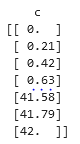

The person will have $w-c$ left for the future:

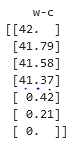


Try all combinations of $w-c$ and $c$ to see which gives the max:

$$\begin{aligned}
    V_{T-1}(W_{T-1}) & = \max_{c_{T-1}}\left\{ \underbrace{\sqrt{c_{T-1}}}_{V_{now}} + \beta \underbrace{\sum_{i=1}^K V_{T}(W_{T-1}-c_{T-1}+\varepsilon_i)\pi_i}_{EV_{next}}  \right\}
\end{aligned}$$


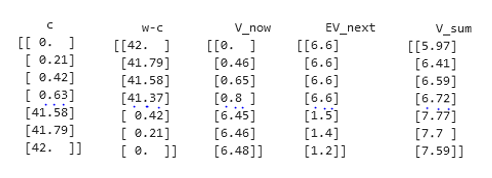



In this case apparently $c=24.27$ maximizies, $V^*=8.92$.

How do we actually compute $V_{T}(x)$? We know some of the points in the value function:


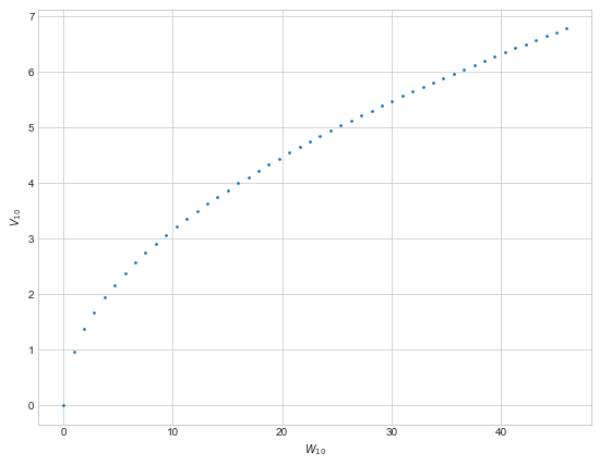




How do we handle off-grid points? Use linear interpolation (np.interp(x,$W_{10}$,$V_{10}$)):

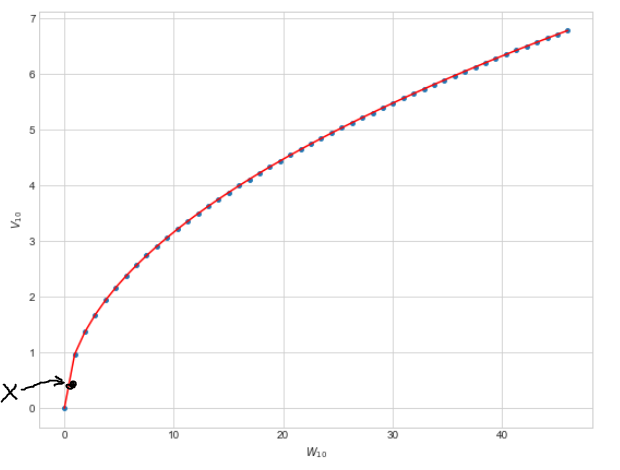

Use this interpolator to calculate the entire expectation:

$$\sum_{i=1}^K V_{T}(W_{T-1}-c_{T-1}+\varepsilon_i)\pi_i=V_{T}(W_{T-1}-c_{T-1}+0)\pi_1+V_{T}(W_{T-1}-c_{T-1}+1)\pi_2+...+V_{T}(W_{T-1}-c_{T-1}+4)\pi_5$$

Now, we can fill in $EV_{next}$:

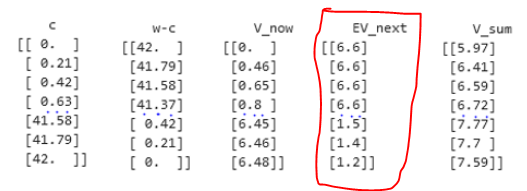




Continue this procedure for the rest of the state grid points:


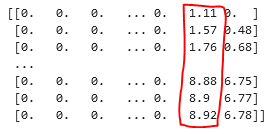




Finally, continue this procedure further back in time.

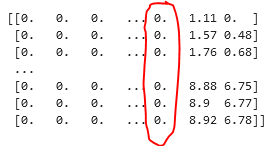

# Exercise 5: Numerical Integration
Consider the numerical integration problem
$$
\int x^{2}dg(x),\,\,\,x\sim\mathcal{N}(0,1)
$$

Note that we can analytically show that for $f(x)=x^{2}$ (it is the
variance of $x$)
$$
\int f(x)g(x)dx=1
$$

How do we deal with continous shocks?



Notice, the integral is really just the expectation of $f(x)$ with the density function $g(x)$ (normal density in our case).
$$
\int f(x)g(x)dx=E[f(x)]
$$

Why not just approximate the expectation using law of large numbers?

$$
E[f(x)]\approx \frac{1}{N} \sum_{i=1}^N f(x_i)
$$

This is the principle of Monte Carlo simulation. Draw $N$ points from $g(x)$, calculate $f(x)$ and take the mean, easy!

Monte Carlo simulation might give horrible coverage of the distribution, because it assigns same weight to each draw ($1/N$). Instead, we can assign smarter weights using Gauss-Hermite Quadrature:


$$
E[f(x)]\approx w_i \sum_{i=1}^N f(x_i)
$$


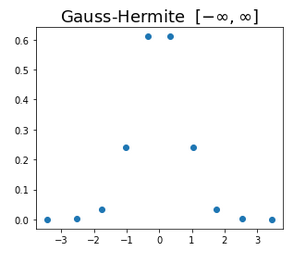


However, weights are based on: 

$$g(x) =  exp(-x^2) \neq \frac{1}{\sigma \sqrt{2 \pi}} e^{-\left(\frac{y-\mu}{\sqrt{2}\sigma}\right)^2}$$.

Use the change of variables $x=\frac{y-\mu}{\sqrt{2}\sigma}$ to get $y=\sqrt{2}\sigma x+\mu$ and insert:

\begin{align*}
\mathbb{E}[f(Y)] & =\frac{1}{\sqrt{2\pi}\sigma}\int_{-\infty}^{\infty}f(y)e^{-\frac{(y-\mu)^{2}}{2\sigma^{2}}}dy\\
 & =\frac{1}{\sqrt{2\pi}\sigma}\int_{-\infty}^{\infty}f(\sqrt{2}\sigma x+\mu)e^{-\frac{(\sqrt{2}\sigma x+\mu-\mu)^{2}}{2\sigma^{2}}}d(\sqrt{2}\sigma x+\mu)\\
 & =\frac{1}{\sqrt{2\pi}\sigma}\int_{-\infty}^{\infty}f(\sqrt{2}\sigma x+\mu)e^{-x^{2}}\sqrt{2}\sigma dx\\
 & =\frac{1}{\sqrt{\pi}}\int_{-\infty}^{\infty}f(\sqrt{2}\sigma x+\mu)e^{-x^{2}}dx\\
 & \approx\frac{1}{\sqrt{\pi}}\sum_{i=1}^{N}\omega_{i}f(\sqrt{2}\sigma x_{i}+\mu)
\end{align*}

Check the maths yourself.